## Random number generator

This notebook generates uniformly distributed random numbers using a quantum computer.

In [25]:
# Imports
import pennylane as qml
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# Configure Device
n_qubits = 1
shots = 1024

local = False
remote_device = None
%store -r remote_device

if local:
    # Local simulator
    dev = qml.device("default.qubit", wires=n_qubits, shots=shots)
elif remote_device:
    dev = remote_device
else:
    # Connect to IBMQ Device
    with open('../config/token.txt', 'r') as file:
        token = file.read()

    remote_device = qml.device(
        'qiskit.ibmq', wires=1,
        backend='ibmq_armonk', ibmqx_token=token,
        shots=shots)

    %store remote_device
    dev = remote_device

In [27]:
# Generate Random Numbers
@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    return qml.sample(qml.PauliZ(wires=0))

result = circuit()

In [28]:
# Evaluate results
series = pd.Series(result)
positive = len(series[series > 0])
negative = len(series[series < 0])

print("Positive:", positive)
print("Negative:", negative)

Positive: 502
Negative: 522


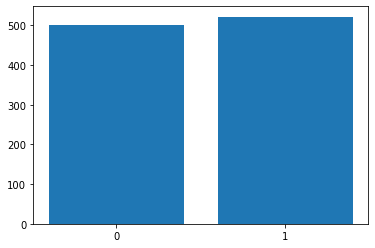

In [29]:
# Plot results
plt.bar(["0", "1"], [positive, negative])
plt.show()

In [30]:
# Store results
series.to_csv("../output/random_numbers.csv")